IMPORTING THE IMPORTANT LIBRARIES like pandas,numpy,seaborn,matplotlib

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
import os
print(os.getcwd())

c:\Users\piyus\OneDrive\Desktop\ml project\mlproject\notebook\data


READING THE CSV FILE

In [23]:
df = pd.read_csv("stud.csv")

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

THERE IS NO NULL VALUE IN THIS DATASET

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
df.duplicated().sum()

0

NO DUPLICATES ARE THERE IN THIS DATASET

In [29]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


CHECKING THE UNIQUE VALUES IN EACH CATEGORY

In [30]:
## checking the unique values in each category
print("how many category in gender -: ",len(df["gender"].unique()))
print(df["gender"].unique())
print("how many category in race/ethnicity -: ",len(df["race/ethnicity"].unique()))
print(df["race/ethnicity"].unique())
print("how many category in parental level of education -: ",len(df["parental level of education"].unique()))
print(df["parental level of education"].unique())
print("how many category in lunch -: ",len(df["lunch"].unique()))
print(df["lunch"].unique())
print("how many category in test preparation course -: ",len(df["test preparation course"].unique()))
print(df["test preparation course"].unique())


how many category in gender -:  2
['female' 'male']
how many category in race/ethnicity -:  5
['group B' 'group C' 'group A' 'group D' 'group E']
how many category in parental level of education -:  6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
how many category in lunch -:  2
['standard' 'free/reduced']
how many category in test preparation course -:  2
['none' 'completed']


In [31]:
##numeracal feature and categorical feature
num_feature = [feature for feature in df.columns if df[feature].dtype!='O']
cat_feature = [feature for feature in df.columns if df[feature].dtype=='O']

print("we have {} numerical features {} -: ".format(len(num_feature),num_feature))
print("we have {} cat feature {} -: ".format(len(cat_feature),cat_feature))

we have 3 numerical features ['math score', 'reading score', 'writing score'] -: 
we have 5 cat feature ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] -: 


ADDING THE COLUMN OF TOTAL SCORE AND AVERAGE

In [32]:
## calculating the total marks and average marks based on others marks
df["total score"] = df["reading score"]+df["writing score"]+df["math score"]
df["average"] = df["reading score"]+df["writing score"]+df["math score"]/3

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,170.000000
1,female,group C,some college,standard,completed,69,90,88,247,201.000000
2,female,group B,master's degree,standard,none,90,95,93,278,218.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,116.666667
4,male,group C,some college,standard,none,76,78,75,229,178.333333


EDA - EXPLORATORY DATA ANALYSIS

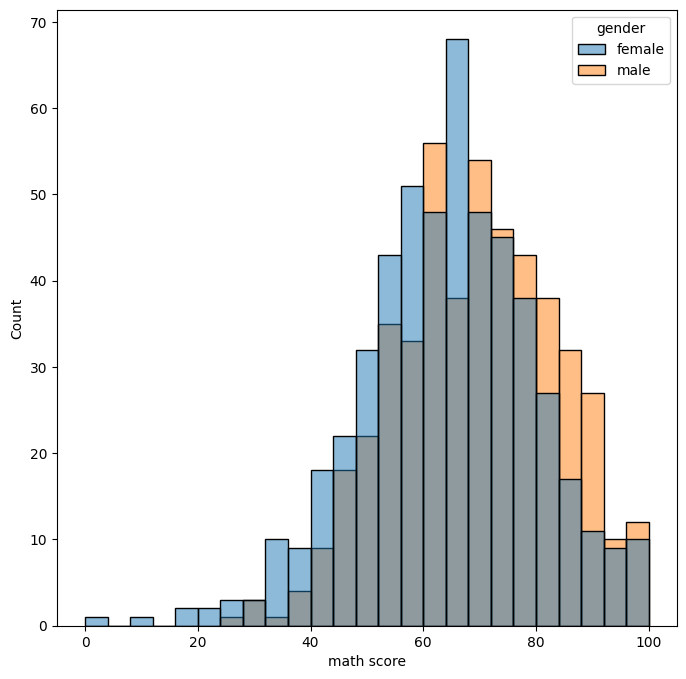

In [34]:
##visualizing the data 
plt.figure(figsize=(8,8))
sns.histplot(data=df,x=df["math score"],hue=df["gender"])
plt.xlabel("math score")
plt.show()



AFTER VISUALIZING THE ABOVE GRAPH IN MATH SCORE GIRLS ARE PERFORMING WELL THAN BOYS

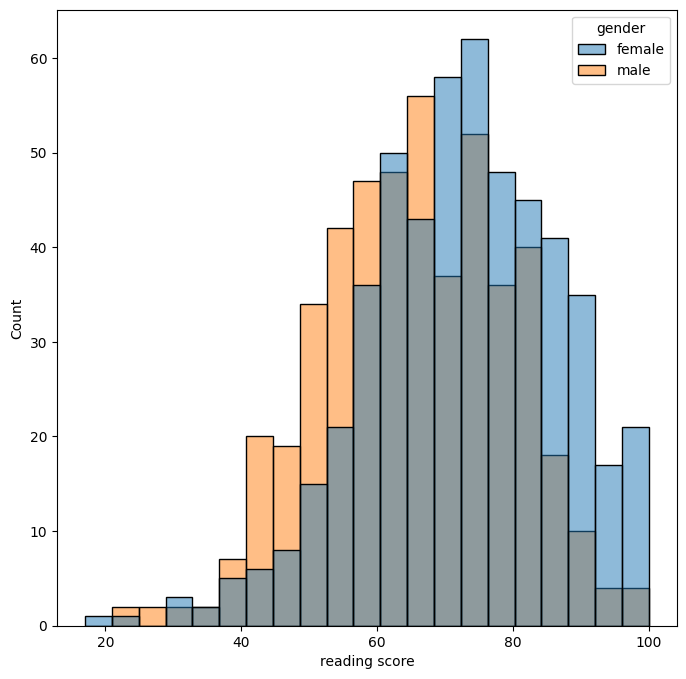

In [35]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x=df["reading score"],hue=df["gender"])
plt.xlabel("reading score")
plt.show()

IN THE READING SCORE TOO GIRLS ARE TEND TO PERFORM WELL THAN BOYS

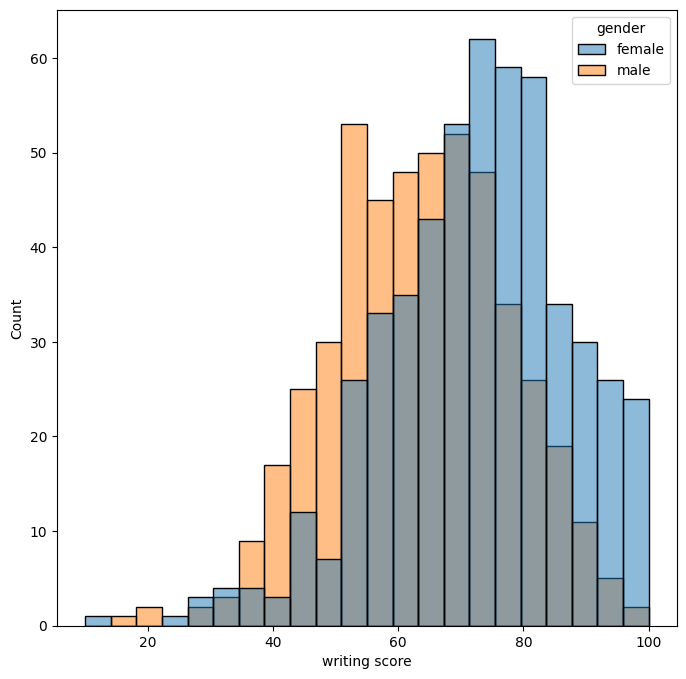

In [36]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x=df["writing score"],hue=df["gender"])
plt.xlabel("writing score")
plt.show()

AFTER VISUALISING ALL THE SUBJECTS GIRLS ARE PERFORMING WELL IN ALL THREE SUBJECTS TAHN THE BOYS 

<Axes: xlabel='total score', ylabel='Count'>

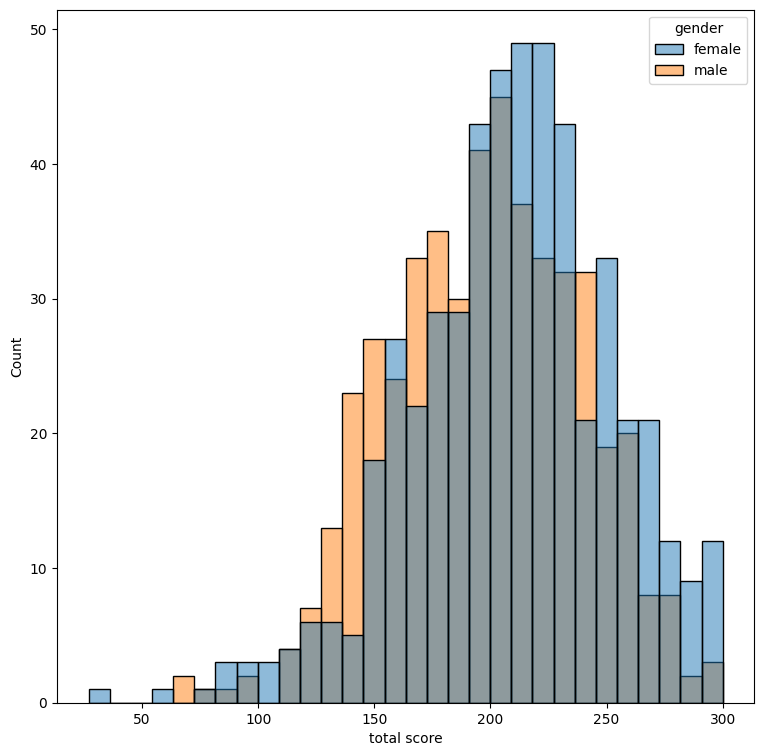

In [37]:
plt.figure(figsize=(9,9))
sns.histplot(bins=30,data=df,x=df["total score"],hue = df["gender"])

IN THE TOTAL SCORE ALSO FEMALE ARE SCORING WELL THAN MALE 

In [38]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [39]:
## counting the student who got full marks 
got_full_in_reading = df[df["reading score"]==100]["average"].count()
got_full_in_writing = df[df["writing score"]==100]["average"].count()
got_full_in_math  = df[df["math score"]==100]["average"].count()

In [40]:
print(f"the number of student who got full mark in math -: {got_full_in_reading}")
print(f"the number of student who got full mark in reading -: {got_full_in_writing}")
print(f"the number of student who got full mark in writing  -: {got_full_in_math}")

the number of student who got full mark in math -: 17
the number of student who got full mark in reading -: 14
the number of student who got full mark in writing  -: 7


INSIGHTS

THERE ARE 7 NUMBER OF STUDENTS WHO GOT FULL MARK IN MATH

THRE ARE 17 NUMBER OF STUDENTS WHO GOT FULL MARK IN READING
 
THERE ARE 14 NUMBER OF STUDENTS WHO GOT FULL MARK IN WRITING

In [41]:
reading_less = df[df["reading score"]<33]["average"].count()
writing_less = df[df["writing score"]<33]["average"].count()
math_less  = df[df["math score"]<33]["average"].count()

In [42]:
print(f"the number of student who got less mark in math -: {math_less}")
print(f"the number of student who got less mark in reading -: {reading_less}")
print(f"the number of student who got less mark in writing  -: {writing_less}")

the number of student who got less mark in math -: 19
the number of student who got less mark in reading -: 11
the number of student who got less mark in writing  -: 12


INSIGHTS

THERE ARE 19 NUMBER OF STUDENTS WHO GOT LESS MARK IN MATH

THERE ARE 11 NUMBER OF STUDENTS WHO GOT LESS MARK IN WRITING

THERE ARE 12 NUMBER OF STUDENTS WHO GOT LESS MARK IN READING

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,170.000000
1,female,group C,some college,standard,completed,69,90,88,247,201.000000
2,female,group B,master's degree,standard,none,90,95,93,278,218.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,116.666667
4,male,group C,some college,standard,none,76,78,75,229,178.333333


C:\Users\piyus\AppData\Local\Temp\ipykernel_28040\2144862657.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\piyus\AppData\Local\Temp\ipykernel_28040\2144862657.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\piyus\AppData\Local\Temp\ipykernel_28040\2144862657.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


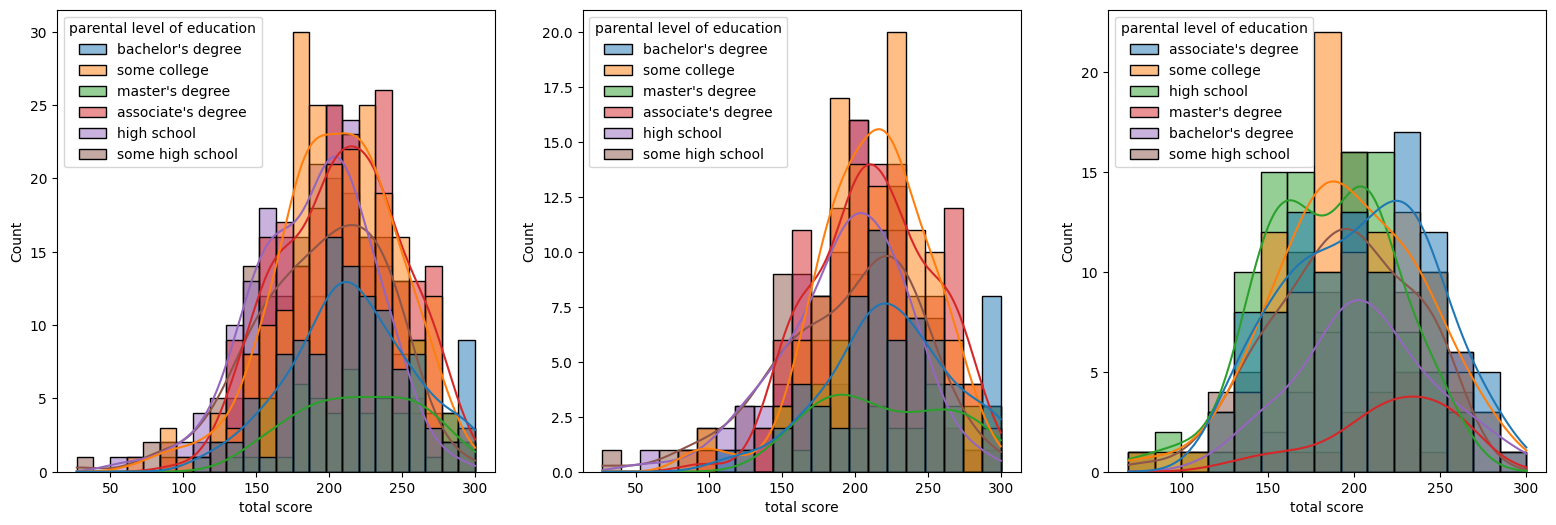

In [45]:
plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
sns.histplot(data=df,x="total score",kde=True,hue="parental level of education")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='total score',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="total score",kde=True,hue="parental level of education")
plt.show()

CONCLUSION

IN GIRLS WHOSE PARENTS HAVE THE  BACHELOR'S DEGREE,SOME COLLEGE,MASTER'S DEGREE TEND TO PERFORM WELL AND ACHIEVE HIGHER TOTAL SCORE , WHILE IN BOYS WHOSE  PARENTS  HAVE  AN ASSOCIATE'S DEGREE ARE MOST LIKELY TO SCORE  ABOVE 200.

<Axes: xlabel='total score', ylabel='Count'>

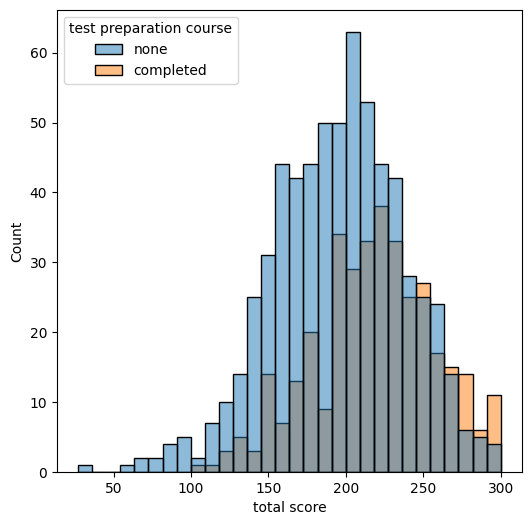

In [44]:
plt.figure(figsize=(6,6))
sns.histplot(bins=30,data=df,x=df["total score"],hue = df["test preparation course"])

INSIGHTS 

Students who completed the test preparation course tend to achieve significantly higher total scores compared to  those who did not complete this course

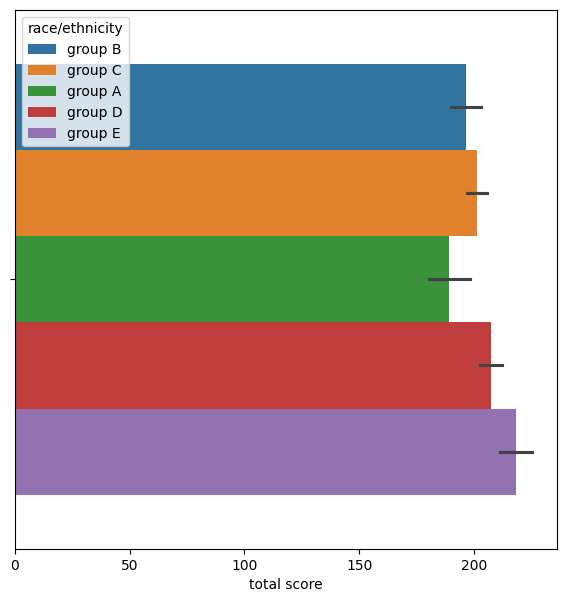

In [50]:
plt.figure(figsize=(7,7))
sns.barplot(data=df,x=df["total score"],hue=df["race/ethnicity"])
plt.xlabel("total score")
plt.show()

CONCLUSION

"Among the difference race/ethnicity groups, students in group E have the highest average total score,while those in group B have the lowest"

C:\Users\piyus\AppData\Local\Temp\ipykernel_12760\121800974.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\piyus\AppData\Local\Temp\ipykernel_12760\121800974.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\piyus\AppData\Local\Temp\ipykernel_12760\121800974.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


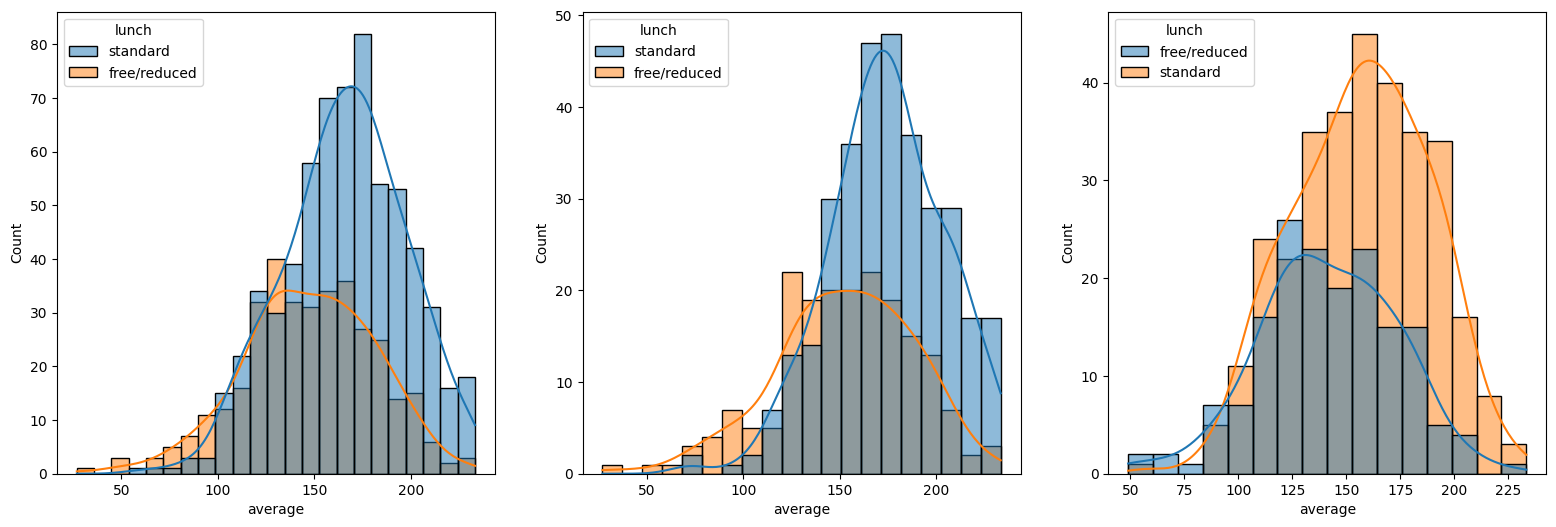

In [51]:
plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

STANDARD LUNCH HELPS STUDENTS TO PERFORM GOOD MARKS 
WHETHER ITS GIRLS OR BOY 